In [2]:
import xarray as xr
da = xr.open_rasterio('tony2006.tif')

In [3]:
da

<xarray.DataArray (band: 1, y: 3845, x: 2886)>
[11096670 values with dtype=float64]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 36.0 36.0 36.0 36.01 36.01 ... 43.99 44.0 44.0 44.0
  * x        (x) float64 -78.0 -78.0 -78.0 -77.99 ... -72.01 -72.0 -72.0 -72.0
Attributes:
    transform:      (0.002079561862564987, 0.0, -78.00085750968124, 0.0, 0.00...
    crs:            +init=epsg:4326
    res:            (0.002079561862564987, -0.0020810045000000006)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    descriptions:   ('etasw',)
    AREA_OR_POINT:  Area

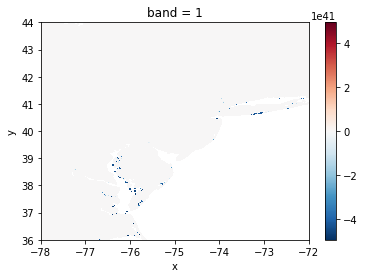

In [5]:
da.plot()

In [6]:
da_masked = da.where(da>0.0)

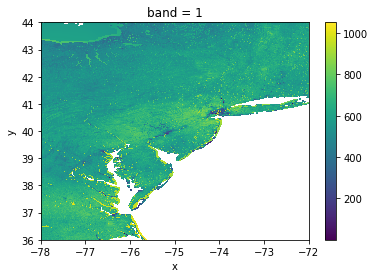

In [7]:
da_masked.plot()

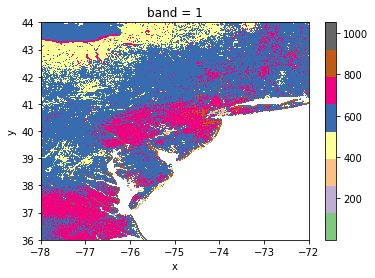

In [8]:
da_masked.plot(cmap = 'Accent')

In [9]:
!rio info tony2006.tif

{"bounds": [-78.00085750968124, 44.00046632391505, -71.99924197431869, 35.99900402141505], "colorinterp": ["gray"], "count": 1, "crs": "EPSG:4326", "descriptions": ["etasw"], "driver": "GTiff", "dtype": "float64", "height": 3845, "indexes": [1], "interleave": "band", "lnglat": [-75.00004974199996, 39.99973517266505], "mask_flags": [["nodata"]], "nodata": NaN, "res": [0.002079561862564987, -0.0020810045000000006], "shape": [3845, 2886], "tiled": false, "transform": [0.002079561862564987, 0.0, -78.00085750968124, 0.0, 0.0020810045000000006, 35.99900402141505, 0.0, 0.0, 1.0], "units": [null], "width": 2886}


# missing cogeo

```
! rio cogeo create tony2006.tif cog_annual_etasw_.tif

Usage: rio [OPTIONS] COMMAND [ARGS]...
Try 'rio --help' for help.

Error: No such command 'cogeo'.
```

In [11]:
#!pip install --user rio-cogeo

  Stored in directory: /home/jupyter-kagone/.cache/pip/wheels/01/c8/ec/315e0099c1b46103012ce9b7193be5b49e342b7f11ad1a5db6
Successfully built rio-cogeo
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
! rio cogeo create tony2006.tif cog_annual_etasw_.tif

Reading input: /home/jupyter-kagone/opt/etm/00-notebooks/tony2006.tif
Adding overviews...
Updating dataset tags...
Writing output to: /home/jupyter-kagone/opt/etm/00-notebooks/cog_annual_etasw_.tif


In [13]:
ls -lh *.tif

-rw-r--r-- 1 jupyter-kagone jupyter-kagone 57M Sep 13 22:42 cog_annual_etasw_.tif
-rw-r--r-- 1 jupyter-kagone jupyter-kagone 85M Sep 13 22:27 tony2006.tif


In [14]:
!rio info cog_annual_etasw_.tif

{"blockxsize": 512, "blockysize": 512, "bounds": [-78.00085750968124, 35.998921986074585, -71.99865901392728, 44.00046632391505], "colorinterp": ["gray"], "compress": "deflate", "count": 1, "crs": "EPSG:4326", "descriptions": ["etasw"], "driver": "GTiff", "dtype": "float64", "height": 3846, "indexes": [1], "interleave": "band", "lnglat": [-74.99975826180426, 39.99969415499481], "mask_flags": [["nodata"]], "nodata": NaN, "res": [0.00208048474722841, 0.00208048474722841], "shape": [3846, 2885], "tiled": true, "transform": [0.00208048474722841, 0.0, -78.00085750968124, 0.0, -0.00208048474722841, 44.00046632391505, 0.0, 0.0, 1.0], "units": [null], "width": 2885}


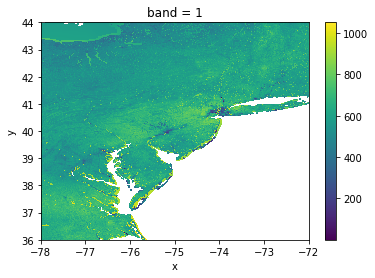

In [15]:
da = xr.open_rasterio('cog_annual_etasw_.tif')
da_masked = da.where(da>0.0)
da_masked.plot()